# Digit Recognition

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.svm import SVC

In [6]:
import numpy as np

In [7]:
# loading the mnist dataset
mnist =fetch_openml('mnist_784')

In [8]:
x = mnist.data
y = mnist.target

In [9]:
x.shape

(70000, 784)

In [10]:
y.shape

(70000,)

In [11]:
print('No of classes/labels : ',np.unique(y))

No of classes/labels :  ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [12]:
#displaying the number of samples for each class
np.bincount(y.astype(int))

array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
      dtype=int64)

In [13]:
# let's take two classes only
x_new = x[(y=='0')|(y=='1')]

In [14]:
x_new.shape

(14780, 784)

In [15]:
y_new = y[(y=='0')|(y=='1')]

In [16]:
y_new.shape

(14780,)

In [17]:
np.unique(y_new)

array(['0', '1'], dtype=object)

In [18]:
#splitting the data
xtrain,xtest,ytrain,ytest = train_test_split(x_new,y_new,test_size=.2,random_state=10)

In [19]:
xtrain.shape

(11824, 784)

In [20]:
xtest.shape

(2956, 784)

In [23]:
#xtrain.max()

In [24]:
#xtrain.min()

In [25]:
std_train = xtrain/255.0

std_test = xtest/255.0

In [26]:
#PCA

In [27]:
pca = PCA(n_components=.95)


In [28]:
pca_train = pca.fit_transform(std_train)

In [29]:
pca_test = pca.transform(std_test)

In [30]:
pca_train.shape

(11824, 97)

In [31]:
pca_test.shape

(2956, 97)

In [32]:
clf =SVC(kernel='linear')

In [33]:
clf.fit(pca_train,ytrain)

SVC(kernel='linear')

In [34]:
test_score =clf.score(pca_test,ytest)

In [35]:
train_score = clf.score(pca_train,ytrain)

In [36]:
print("test score : ",test_score," train score : ",train_score)

test score :  0.9989851150202977  train score :  1.0


In [37]:
import cv2

In [38]:
import matplotlib.pyplot as plt

In [39]:
img = cv2.imread('t1.png',0)

In [40]:
img.shape

(502, 574)

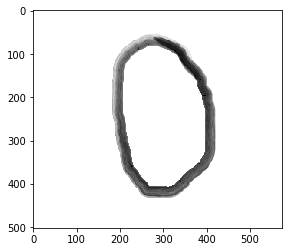

In [41]:
plt.imshow(img,cmap='gray')

In [42]:
img1 =np.invert(img)

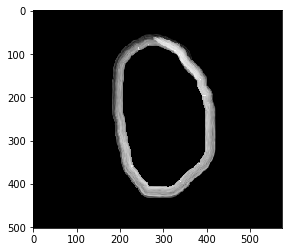

In [43]:
plt.imshow(img1,cmap='gray')

In [44]:
img1 =cv2.resize(img1,(28,28))
img1.shape

(28, 28)

In [46]:
img1 = img1.reshape(1,784)
img1.shape

(1, 784)

In [48]:
std =StandardScaler()

In [51]:
pcaimg = pca.transform(img1)

In [53]:
pcaimg.shape

(1, 97)

In [54]:
clf.predict(pcaimg)

array(['0'], dtype=object)

In [ ]:
# hence performed :)